In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.collections import PatchCollection
import os

In [17]:
def add_timeline(timeline, label, ypos, ax, width=0.1, hatch=None, fill=True, alpha=1):

    tlim = ax.get_xlim()[0]
    t0 = tlim - (8.*365.) # text x-position

    tbeg = mdates.date2num(dt.datetime.strptime(timeline['start'], '%Y%m%d'))
    tend = mdates.date2num(dt.datetime.strptime(timeline['end'], '%Y%m%d'))
    tnow = mdates.date2num(dt.datetime.now())
    
    if tbeg < tlim: tbeg = tlim # Set start of rectangle to lower limit of plot
        
    y0 = ypos-(width*0.5) # y-position for rectangle
        
    #if tend > tnow:
    #    rect = []
    #    length1 = tnow - tbeg
    #    rect.append( mpatches.Rectangle([tbeg, y0], length1, width, color=timeline['color']) )
    #    length2 = tend - tnow
    #    rect.append( mpatches.Rectangle([tnow, y0], length2, width, color=timeline['color']) )
    #    p = PatchCollection(rect)
    #    ax.add_collection(p)
    #else:
    #    length = tend - tbeg
    #    rect = mpatches.Rectangle([tbeg, y0], length, width, color=timeline['color'])
    #    ax.add_patch(rect)
    
    length = tend - tbeg
    rect = mpatches.Rectangle([tbeg, y0], length, width, color=timeline['color'], 
                              hatch=hatch, fill=fill, alpha=alpha)
    ax.add_patch(rect)
    
    ax.annotate(label, xy=(tbeg, y0), xytext=(t0, ypos-0.02), fontsize=36)

In [10]:
stale = 'lightpink'
discontinued = '0.5'
current = 'red'
old = 'khaki'
tobediscontinued = 'salmon'
reanalysis = {
              'ASR':    {'start': '20000101', 'end': '20111231', 'color': stale},
              'MERRA':  {'start': '19790101', 'end': '20160229', 'color': discontinued},
              'MERRA2': {'start': '19800101', 'end': '20201231',  'color': current},
              'ERA40':  {'start': '19580101', 'end': '20011231', 'color': discontinued},
              'ERA-Interim': {'start': '19790101', 'end': '20191231', 'color': tobediscontinued},
              'ERA5':   {'start': '19790101', 'end': '20251231', 'color': current},
              'NCEP1':  {'start': '19480101', 'end': '20201231', 'color': old},
              'NCEP2':  {'start': '19790101', 'end': '20201231', 'color': old},
              'CFSR/CFSv2':   {'start': '19790101', 'end': '20251231', 'color': current},
              'JRA25':  {'start': '19790101', 'end': '20041231', 'color': discontinued},
              'JRA55':  {'start': '19580101', 'end': '20251231', 'color': current},
             }

missions = {'CRYOSAT-2': {'start': '20101022', 'end': '20221231', 'color': 'aqua'},
            'ICESAT': {'start': '20030801', 'end': '20091011', 'color': 'lightskyblue'},
            'ICESAT-2': {'start': '20181030', 'end': '20281231', 'color': 'cornflowerblue'},
            'ICEBRIDGE': {'start': '20090301', 'end': '20181231', 'color': 'mediumslateblue'},
            'ERS-1/2': {'start': '19931001', 'end': '20010331', 'color': 'royalblue'}}

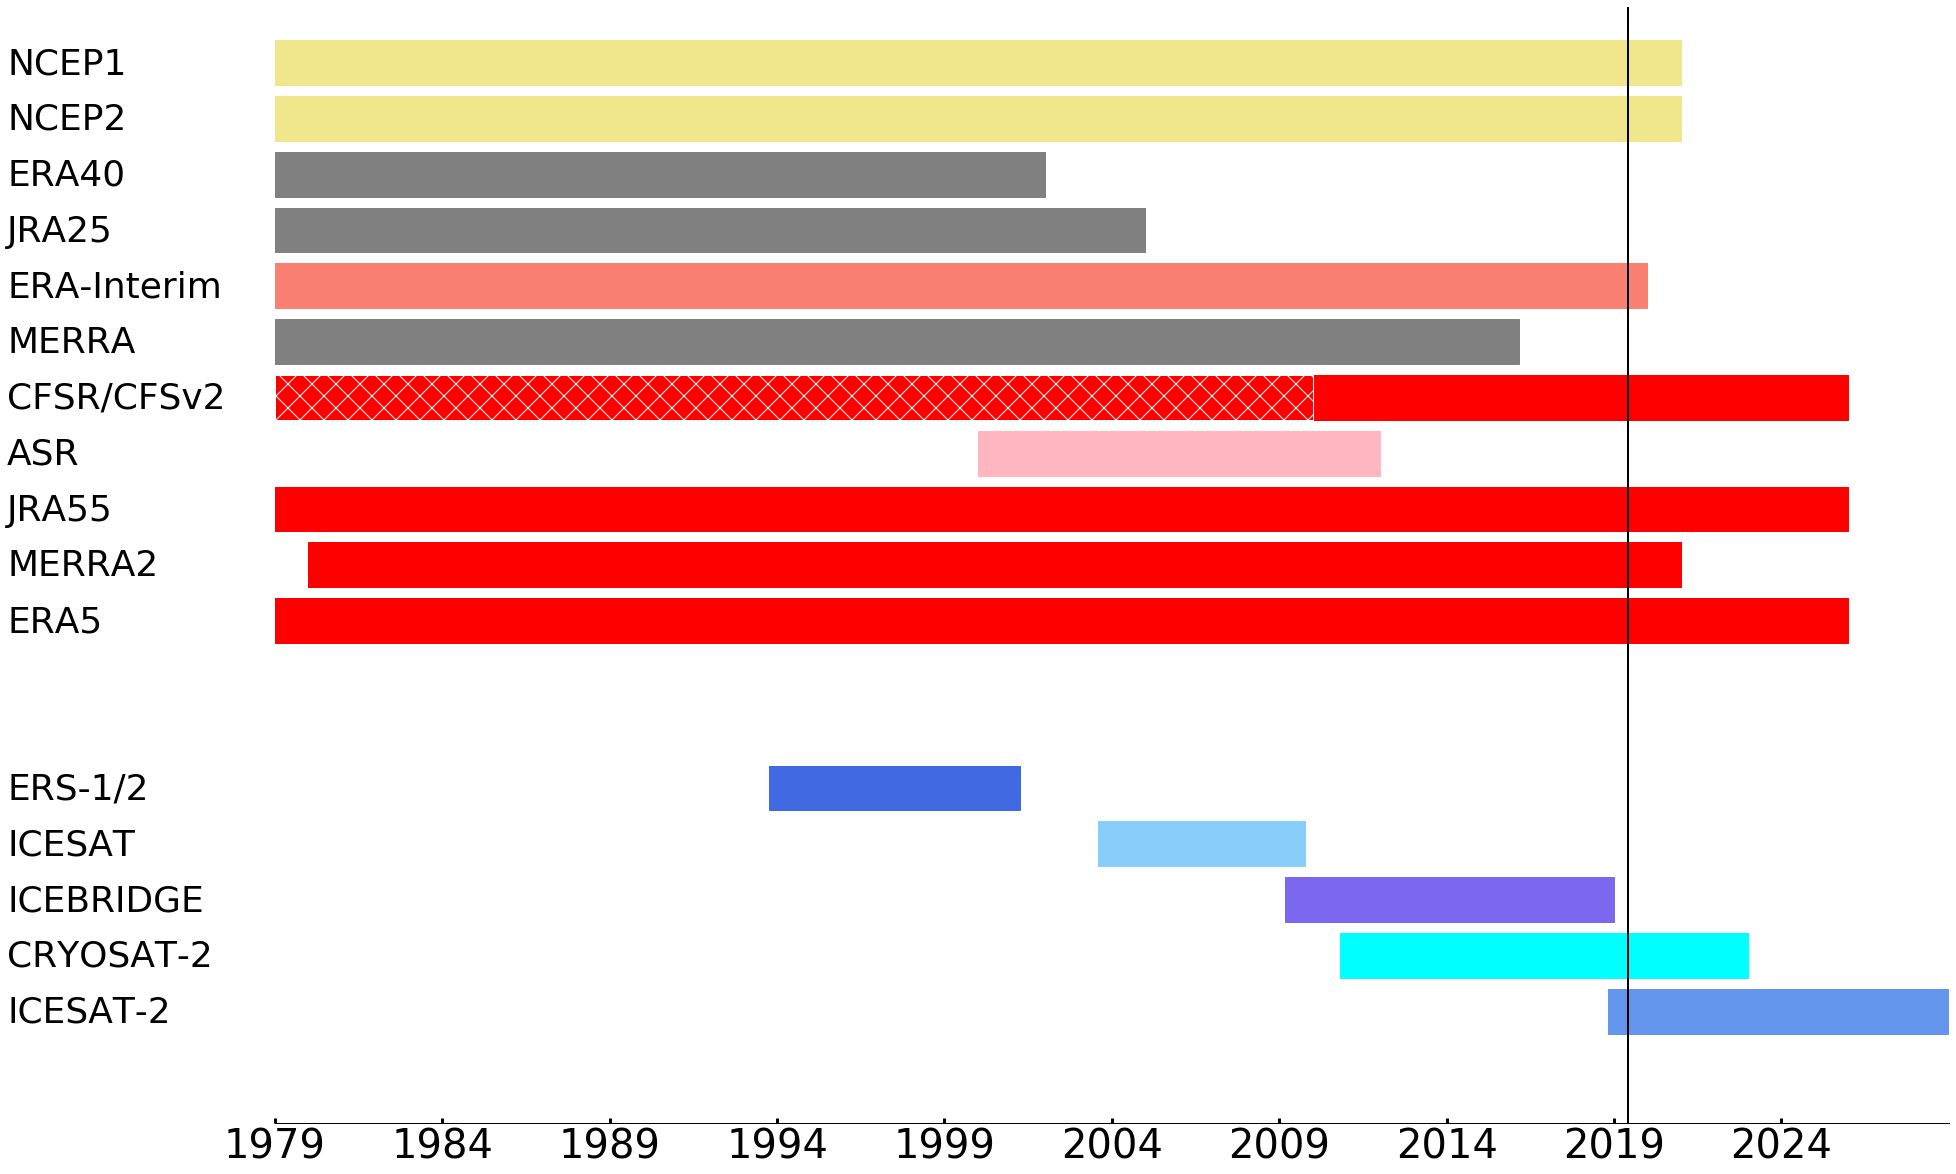

In [23]:
fig, ax = plt.subplots(figsize=(30,20))

ax.set_xlim(dt.datetime(1979,1,1),dt.datetime(2028,12,31))
ax.set_ylim(0,2)
ax.axvline(dt.datetime.now(), lw=2, c='k')

ypos = 2
for key in ['NCEP1', 'NCEP2', 'ERA40', 'JRA25', 'ERA-Interim', 'MERRA', 
            'CFSR/CFSv2', 'ASR', 'JRA55', 
            'MERRA2', 'ERA5']: #reanalysis.keys():
    ypos = ypos - 0.1
    add_timeline(reanalysis[key], key, ypos, ax, width=0.08)
    if key == 'CFSR/CFSv2':
        add_timeline({'start': '19790101', 'end': '20091231', 'color': 'w'}, 
             '', ypos, ax, width=0.08, fill=False, hatch='x', alpha=1)

ypos = 0.7
for key in ['ERS-1/2', 'ICESAT', 'ICEBRIDGE', 'CRYOSAT-2', 'ICESAT-2']: #missions.keys():
    ypos = ypos - 0.1
    add_timeline(missions[key], key, ypos, ax, width=0.08)

# Add extra reanalysis symbols
#add_timeline({'start': '19790101', 'end': '19991231', 'color': current}, 
#             '', 2.-0.6, ax, width=0.08, fill=False, hatch='x')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.tick_params(top='off', bottom='on', left='off', right='off', 
               labelleft='off', labelbottom='on', labelsize=40, color='k', width=3, size=5)

diri = '../figures/current' #r'C:\Users\apbarret\Documents\Presentations\AGU2018'
fig.savefig(os.path.join(diri,'reanalysis_timeline.png'))